<a href="https://colab.research.google.com/github/vieirapcm/tcc_ai_fake-news/blob/main/01_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Estudo sobre pré-processamento de dados
# Objetivo: Ler os datasets e executar uma função para limpar os textos
#
# Etapas:
# [X] - Remover dos datasets as strings "É #FAKE" e "É #FATO"
# [X] - Captalização
# [ ] - Retirada de links
# [ ] - Retirada de caracteres especiais
# [ ] - Retirada de colchetes
# [ ] - Retirada de Stop-words
# [ ] - Tokenização

In [1]:
import sys, os
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

from spacy.lang.pt import Portuguese

from wordcloud import WordCloud,STOPWORDS

2022-03-06 18:21:06.527933: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 18:21:06.528015: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Importing custom functions (temp)
current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
parent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)

from helpers.string_cleaner import StringCleaner as sc

In [3]:
# importing dataset directories
ds_dir = os.path.abspath('').split('/')[-1]
ds = os.path.join(parent_dir, "datasets", "use_cases", ds_dir)
print(ds)

/home/vieirapcm/projetos/tcc_ai_fake-news/datasets/use_cases/data_cleaning


In [4]:
globo_ds = pd.read_csv(os.path.join(ds, "globo_check_ds.csv"))

In [5]:
globo_ds.head(10)

,title,description,url
0,É #FAKE que jogador de futebol Alex Apolinário...,Atleta morreu em janeiro de 2021 e ainda não h...,https://g1.globo.com/fato-ou-fake/coronavirus/...
1,É #FAKE que vídeo mostre pai desesperado na Pa...,"Vídeo é antigo, anterior à pandemia e à vacina...",https://g1.globo.com/fato-ou-fake/coronavirus/...
2,É #FAKE imagem de capa da Time em que soldado ...,Imagem não consta em acervo da revista. OMS af...,https://g1.globo.com/fato-ou-fake/coronavirus/...
3,É #FAKE que vídeo em que Boris Johnson dança c...,Política que contracena com Johnson afirma que...,https://g1.globo.com/fato-ou-fake/coronavirus/...
4,É #FAKE que Drauzio Varella escreveu texto ens...,Médico não escreveu coluna com esse teor. A im...,https://g1.globo.com/fato-ou-fake/coronavirus/...
5,"É #FAKE que resolução isente deputados, senado...",Mensagem falsa diz que a isenção é determinada...,https://g1.globo.com/fato-ou-fake/coronavirus/...
6,É #FAKE que Pfizer adicionou trometamina secre...,A trometamina está presente na composição da v...,https://g1.globo.com/fato-ou-fake/coronavirus/...
7,É #FAKE que vídeo mostre homem chorando sobre ...,"Na verdade, a imagem foi feita na Síria e most...",https://g1.globo.com/fato-ou-fake/coronavirus/...
8,É #FAKE que vacinas contra a Covid-19 são prod...,Terapia gênica envolve causar mudanças de prop...,https://g1.globo.com/fato-ou-fake/coronavirus/...
9,É #FAKE que fisioterapeuta do Incor que sofreu...,Fábio Rodrigues tomou a terceira dose em outub...,https://g1.globo.com/fato-ou-fake/coronavirus/...


In [6]:
df = pd.DataFrame(globo_ds)

In [7]:
df['full_text'] = df['title'] + ' ' + df['description']

In [8]:
df = df.drop('url', axis=1)

In [13]:
# stop words using spaCy
nlp_pt = Portuguese()
stopwords = nlp_pt.Defaults.stop_words

def remove_stopwords(text):
    final_text = []
    for token in text.split():
      if token.lower() not in stopwords:
          final_text.append(token)
    return " ".join(final_text)

def normalize_text(text):
    return text.replace('covid-19', 'covid')   \
            .replace('coronavirus', 'covid')   \
            .replace('coronavírus', 'covid')   \
            .replace('corona virus', 'covid')  \
            .replace('corona vírus', 'covid')  \
            .replace('#FAKE', '')              \
            .replace('#FATO', '')

def denoise_text(text):
    text = sc.remove_url(text)
    text = sc.remove_between_square_brackets(text)
    text = sc.remove_special_characters(text)
    text = remove_stopwords(text)
    text = normalize_text(text)

    return text.lower()

df['description'] = df['description'].apply(denoise_text)
df['title'] = df['title'].apply(denoise_text)
df['full_text'] = df['full_text'].apply(denoise_text)
df

,title,description,full_text
0,jogador futebol alex apolinario morreu decorre...,atleta morreu janeiro 2021 nao havia tomado im...,jogador futebol alex apolinario morreu decorre...
1,video mostre pai desesperado paraiba filho mor...,"video antigo, anterior pandemia vacinacao covi...",video mostre pai desesperado paraiba filho mor...
2,imagem capa time soldado armado emblema oms,imagem nao consta acervo revista. oms afirma n...,imagem capa time soldado armado emblema oms im...
3,video boris johnson danca mulher sabre luz gra...,politica contracena johnson afirma imagens fei...,video boris johnson danca mulher sabre luz gra...
4,drauzio varella escreveu texto ensinando socor...,medico nao escreveu coluna teor. imagem falsa ...,drauzio varella escreveu texto ensinando socor...
...,...,...,...
583,mensagem manda prender respiracao 10 segundos ...,texto circula frequencia redes sociais. mensag...,mensagem manda prender respiracao 10 segundos ...
584,livro 1981 previu covid,edicoes recentes obra mencionam palavra wuhan-...,livro 1981 previu covid edicoes recentes obra ...
585,video mostre motorista preso swat china covid,imagens mostram homem tirando mascara sendo ca...,video mostre motorista preso swat china covid ...
586,produtos importados china conter covid,mensagens conteudo alarmista brasil falam risc...,produtos importados china conter covid mensage...


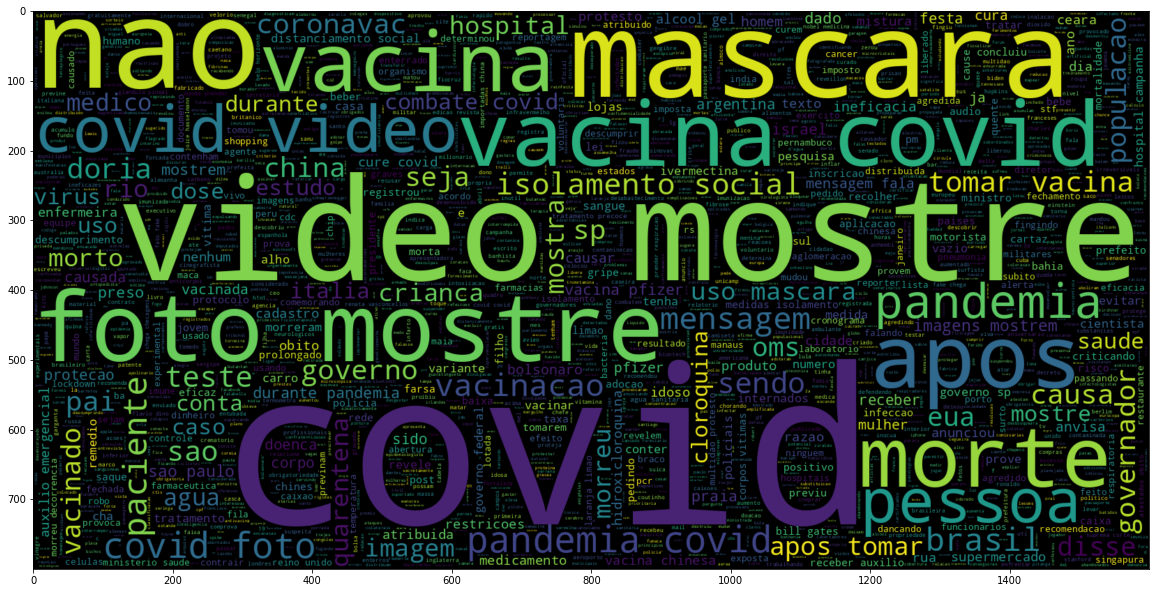

In [11]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df['title']))
plt.imshow(wc, interpolation='bilinear')

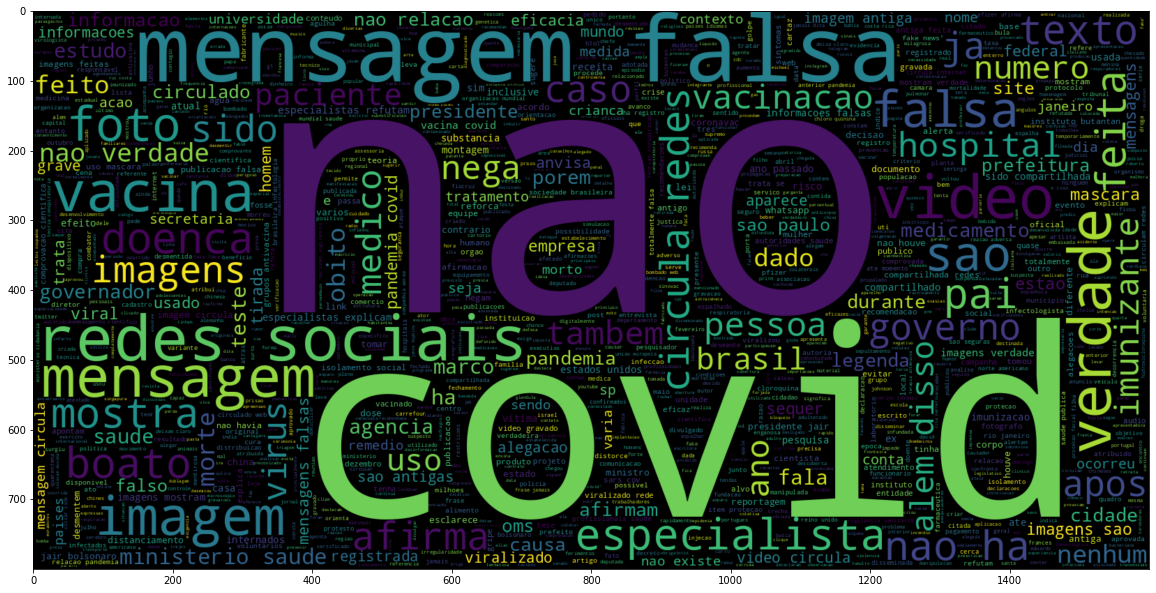

In [12]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df['description']))
plt.imshow(wc, interpolation='bilinear')